In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
/bin/rm -f param/*.par
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:

#echo | install_marx `pwd`  < /dev/null


In [3]:
#source marx-5.5.0/setup_marx.sh 

In [4]:
/bin/rm -rf 4425
download_chandra_obsid 4425 evt1,bpix,bias,pbk,mtl,msk,fov,asol,stat,flt



  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  asol     fits        9 Mb  ####################          < 1 s  30541.5 kb/s
  mtl      fits        8 Mb  ####################          < 1 s  37048.4 kb/s
  evt1     fits        3 Mb  ####################          < 1 s  32326.6 kb/s
  stat     fits        1 Mb  ####################          < 1 s  27801.9 kb/s
  bias     fits       67 Kb  ####################          < 1 s  4823.5 kb/s
  fov      fits        5 Kb  ####################          < 1 s  481.9 kb/s
  flt      fits        4 Kb  ####################          < 1 s  297.2 kb/s
  bpix     fits        4 Kb  ####################          < 1 s  282.3 kb/s
  msk      fits        4 Kb  ####################          < 1 s  328.1 kb/s
  pbk      fits        4 Kb  ####################          < 1 s  359.3 kb/s

      Total download size for ObsId 4425 = 21 Mb
      Total do

In [5]:
chandra_repro 4425 out=`pwd` clob+


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/srcextent/4425'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/srcextent/acisf04425_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /proj/sds/Staff/kjg/Threads/srcextent/acisf04425_repro_bpix1.fits
         Run 'punlearn ardlib' when analysis of this dataset completed.

The data have been reprocessed.
Start your analysis with the new product

In [6]:
cat << EOM > src.reg
# Region file format: CIAO version 1.0
circle(4061.5965,4036.5219,10)

EOM


[1] 24571
[1]+  Done                    ds9 acisf04425_repro_evt2.fits -scale log -bin factor 1 -region src.reg -saveimage png ds9_01.png


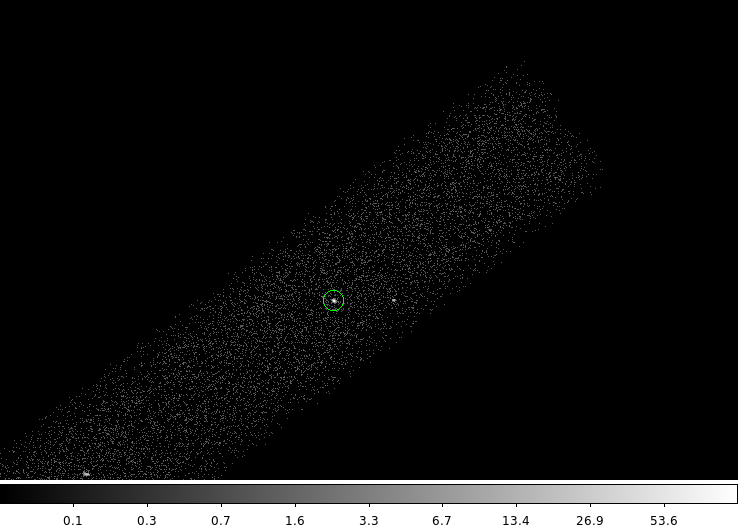

In [7]:
ds9 acisf04425_repro_evt2.fits -scale log \
  -bin factor 1 \
  -region src.reg \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

## Simulate psf

In [8]:
punlearn dmcoords
dmcoords acisf04425_repro_evt2.fits op=sky x=4061.5965 y=4036.5219 celfmt=deg verb=0
ra=`pget dmcoords ra`
dec=`pget dmcoords dec`
echo $ra $dec

173.2705303803413 25.89867030475191


In [9]:
srcflux acisf04425_repro_evt2.fits pos="${ra},${dec}" out=src psfmethod=marx clob+

srcflux
          infile = acisf04425_repro_evt2.fits
             pos = 173.2705303803413,25.89867030475191
         outroot = src
           bands = default
          srcreg = 
          bkgreg = 
         bkgresp = yes
       psfmethod = marx
         psffile = 
            conf = 0.9
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.PhoIndex=2.0
        absmodel = xsphabs.abs1
       absparams = abs1.nH=%GAL%
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = ql

Processing OBI 001
Extracting counts
Simulating psfs using marx
Getting net rate and confidence limits
Getting model independent fluxes 
Getting model fluxes 
Getting photon fluxes 
Running tasks in parall

In [10]:
/bin/ls src*

src.reg		      src_0001_broad.psf	    src_0001_nopsf.arf
src_0001.arf	      src_0001_broad_flux.img	    src_0001_reg.fits
src_0001.pi	      src_0001_broad_projrays.fits  src_0001_srcreg.fits
src_0001.rmf	      src_0001_broad_rates.prob     src_broad.flux
src_0001_4425.fov     src_0001_broad_thresh.expmap  src_summary.txt
src_0001_bkg.pi       src_0001_broad_thresh.img     srcextent.ipynb
src_0001_bkgreg.fits  src_0001_grp.pi		    srcextent.sh


[1] 25549
[1]+  Done                    ds9 src_0001_broad_thresh.img -scale log -zoom 8 -region src.reg src_0001_broad.psf -scale log -saveimage png ds9_02.png


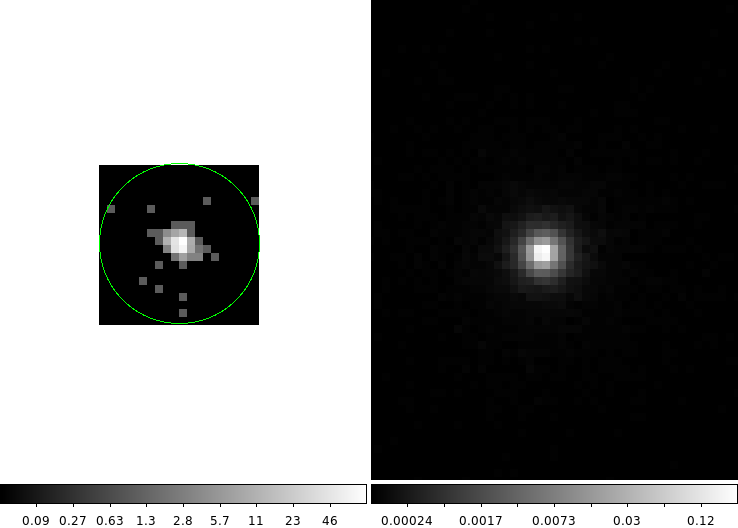

In [11]:
ds9 src_0001_broad_thresh.img -scale log \
    -zoom 8 -region src.reg \
    src_0001_broad.psf -scale log \
    -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

In [16]:
get_sky_limits src_0001_broad.psf


Running: get_sky_limits
  version: 07 October 2016
Checking binning of image: src_0001_broad.psf
  Image has 256 x 256 pixels
  Pixel size is 1.0 by 1.0
  Lower left (0.5,0.5) corner is X,Y= 3934.5, 3909.5
  Upper right (256.5,256.5) corner is X,Y= 4190.5, 4165.5
  DM filter is:
    X=3934.5:4190.5:#256,Y=3909.5:4165.5:#256
  mkexpmap xygrid value is:
    3934.5:4190.5:#256,3909.5:4165.5:#256


In [18]:
dmcopy "src_0001_broad_projrays.fits[bin X=3934.5:4190.5:#256,Y=3909.5:4165.5:#256]" psf.fits cl+

In [22]:
dmcopy "acisf04425_repro_evt2.fits[energy=500:7000]" broad.evt clob+

punlearn srcextent 
pset srcextent srcfile="broad.evt"
pset srcextent outfile=extent.fits
pset srcextent psffile=psf.fits
pset srcextent regfile=src.reg
pset srcextent srcsize=5 x0=4061.5965 y0=4036.5219 binfactor=1 
srcextent mode=h clob+ verb=3


Results for Source 1

Source Observed Size: 0.45 " @ PA 42.46 deg at pixel coords 4061.7, 4036.6
    90% Confidence intervals: (0.41 -- 0.48) @ (INDEF -- INDEF)

PSF Observed Size:    0.40 " @ PA 45.73 deg at pixel coords 4061.6, 4036.5
    90% Confidence intervals: (0.40 -- 0.40) @ (INDEF -- INDEF)

Estimated Intrinsic Size: 0.19 " @ PA 0.00 deg
    90% Confidence intervals: (0.13 -- 0.26) @ (INDEF -- INDEF)

Source is not extended at 90% confidence


In [25]:
dmlist extent.fits"[cols EXTENT_FLAG, X, Y, MAJOR_AXIS, MINOR_AXIS, POS_ANGLE]" data

 
--------------------------------------------------------------------------------
Data for Table Block TABLE
--------------------------------------------------------------------------------
 
ROW    EXTENT_FLAG X                    Y                    MAJOR_AXIS           MINOR_AXIS           POS_ANGLE
 
     1          0      4061.7292103953      4036.5945871674     0.19192230760850     0.19192230760850                    0


In [23]:
srcextent psffile= mode=h clob+ out=extent2.fits

Results for Source 1

Source Observed Size: 0.44 " @ PA 46.29 deg at pixel coords 4061.7, 4036.6
    90% Confidence intervals: (0.40 -- 0.47) @ (INDEF -- INDEF)




In [26]:
dmlist extent2.fits data,clean

#  FILENAME    X                    Y                    MJR_AXIS_RAW         MJR_AXIS_RAW_LO      MJR_AXIS_RAW_HI      MNR_AXIS_RAW         MNR_AXIS_RAW_LO      MNR_AXIS_RAW_HI      POS_ANGLE_RAW        POS_ANGLE_RAW_LO     POS_ANGLE_RAW_HI
 broad.evt        4061.6828641445      4036.6139708757     0.52093096046392     0.47906376106797     0.56279815985987     0.33855799025450     0.31134809880852     0.36576788170049        46.2869439111                  NaN                  NaN


 # Cleanup

In [ ]:
/bin/rm -rf 4425 
/bin/rm -rf marx-5.4.0
/bin/rm -f acisf* pcadf*
